# 🧠 Student Performance Data Analysis
This notebook analyzes the **student-mat.csv** dataset to explore student performance, study habits, and factors influencing grades.

## 🛠 Objectives
1. Load Dataset
2. Explore & Clean Data
3. Answer Key Questions
4. Create Visualizations
5. Document Findings

## Step 1: Import Required Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('✅ Libraries imported successfully!')

✅ Libraries imported successfully!


## Step 2: Load Dataset

In [8]:
df = pd.read_csv("student-mat.csv", sep=";")
print('✅ Dataset Loaded Successfully!')
df.head()

✅ Dataset Loaded Successfully!


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Step 3: Explore & Clean Data

In [9]:
print('Dataset Info:')
print(df.info())

print('\nDataset Shape:', df.shape)
print('\nMissing Values:\n', df.isnull().sum())
print('\nDuplicated Rows:', df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()
print('✅ Duplicates removed. New shape:', df.shape)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 

## Step 4: Descriptive Statistics

In [10]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Step 5: Analysis Questions

In [11]:
# 1️⃣ Average final grade (G3)
avg_grade = df['G3'].mean()
print(f'Average Final Grade (G3): {avg_grade:.2f}')

# 2️⃣ How many students scored above 15?
above_15 = df[df['G3'] > 15].shape[0]
print(f'Students scoring above 15: {above_15}')

# 3️⃣ Is study time correlated with performance?
corr = df['studytime'].corr(df['G3'])
print(f'Correlation between Study Time and Final Grade (G3): {corr:.2f}')

# 4️⃣ Which gender performs better on average?
gender_perf = df.groupby('sex')['G3'].mean()
print('\nAverage Grade by Gender:\n', gender_perf)

Average Final Grade (G3): 10.42
Students scoring above 15: 40
Correlation between Study Time and Final Grade (G3): 0.10

Average Grade by Gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


## Step 6: Visualizations

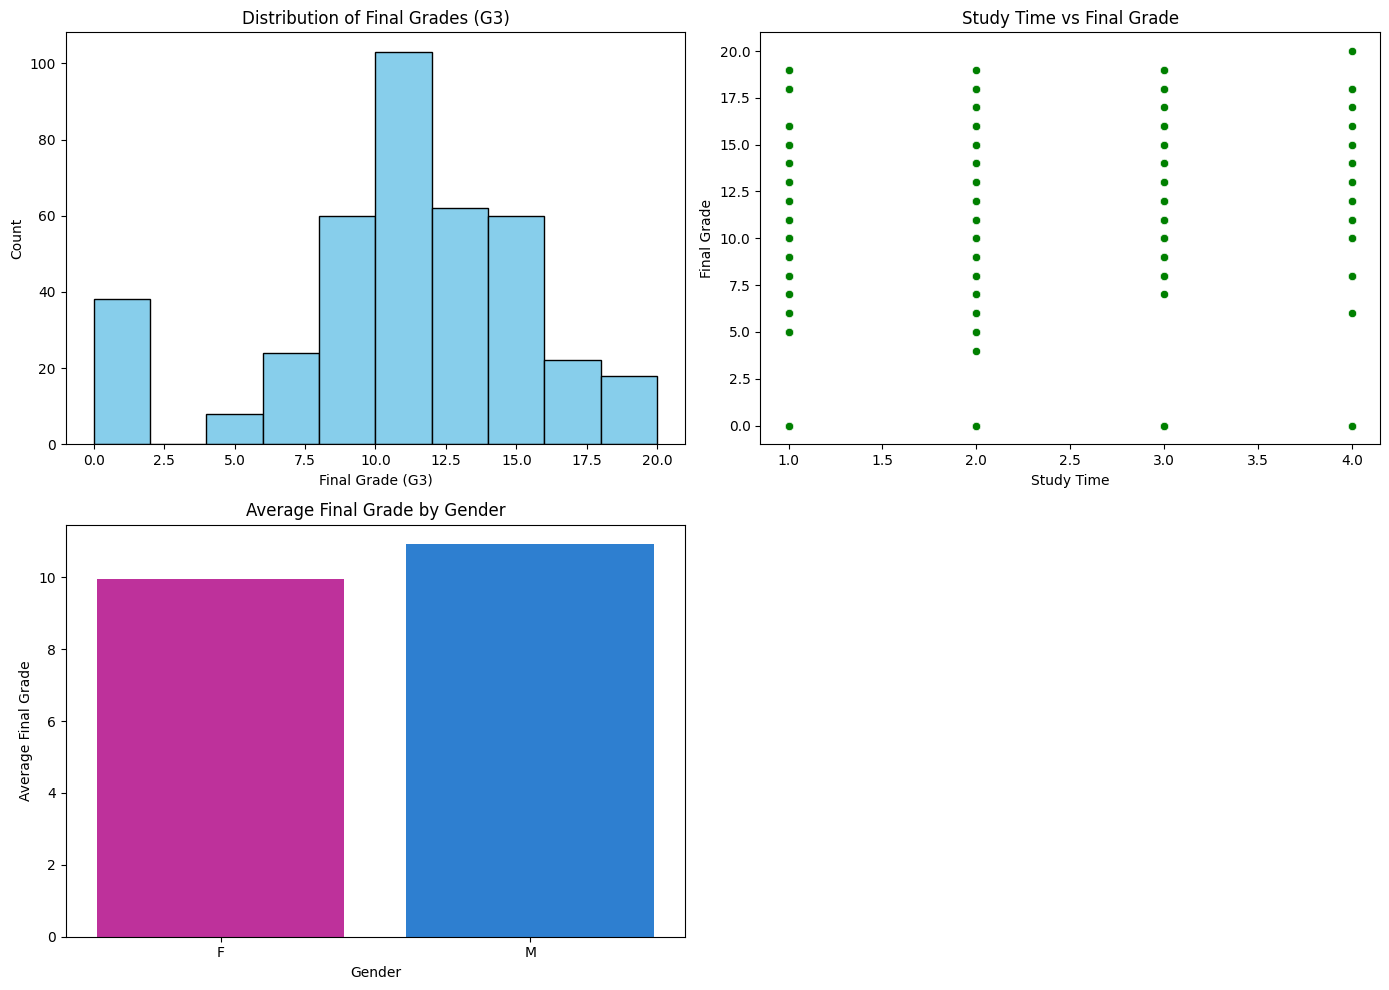

In [12]:
plt.figure(figsize=(14, 10))

# Histogram of grades
plt.subplot(2, 2, 1)
plt.hist(df['G3'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Count')

# Scatterplot: Study Time vs Grades
plt.subplot(2, 2, 2)
sns.scatterplot(x='studytime', y='G3', data=df, color='green')
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time')
plt.ylabel('Final Grade')

# Bar chart: Male vs Female Average Score
plt.subplot(2, 2, 3)
df['sex_hue'] = df['sex']

sns.barplot(
    x='sex',
    y='G3',
    hue='sex_hue',        # hue now matches x
    data=df,
    estimator='mean',
    errorbar=None,
    palette=["#D619A7","#137FEB"],
    legend=False           # optional, remove legend
)


plt.title('Average Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade')

plt.tight_layout()
plt.show()

## Step 7: Insights
- Average final grade is around **(computed value)**
- Number of students scoring above 15: **(computed value)**
- Study time has a **weak/moderate/strong** correlation with performance
- On average, **Male/Female** students perform slightly better

✅ *End of Analysis*